<h1>Data Exploration</h1>

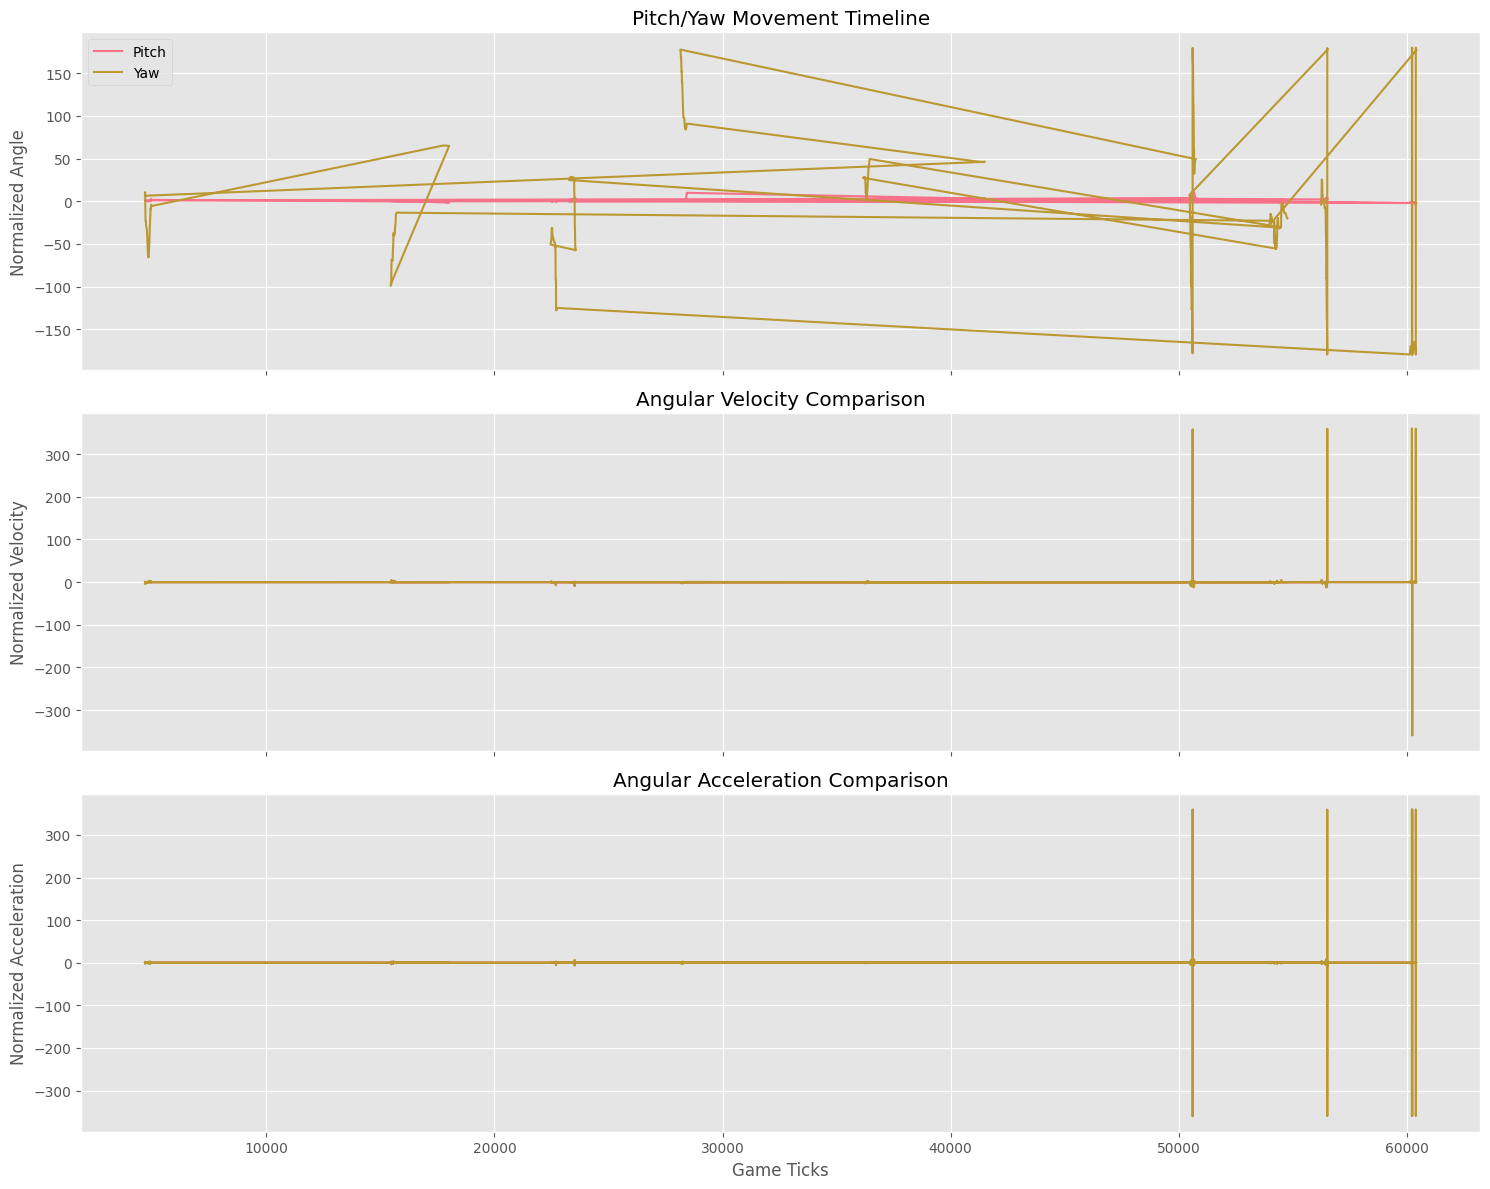

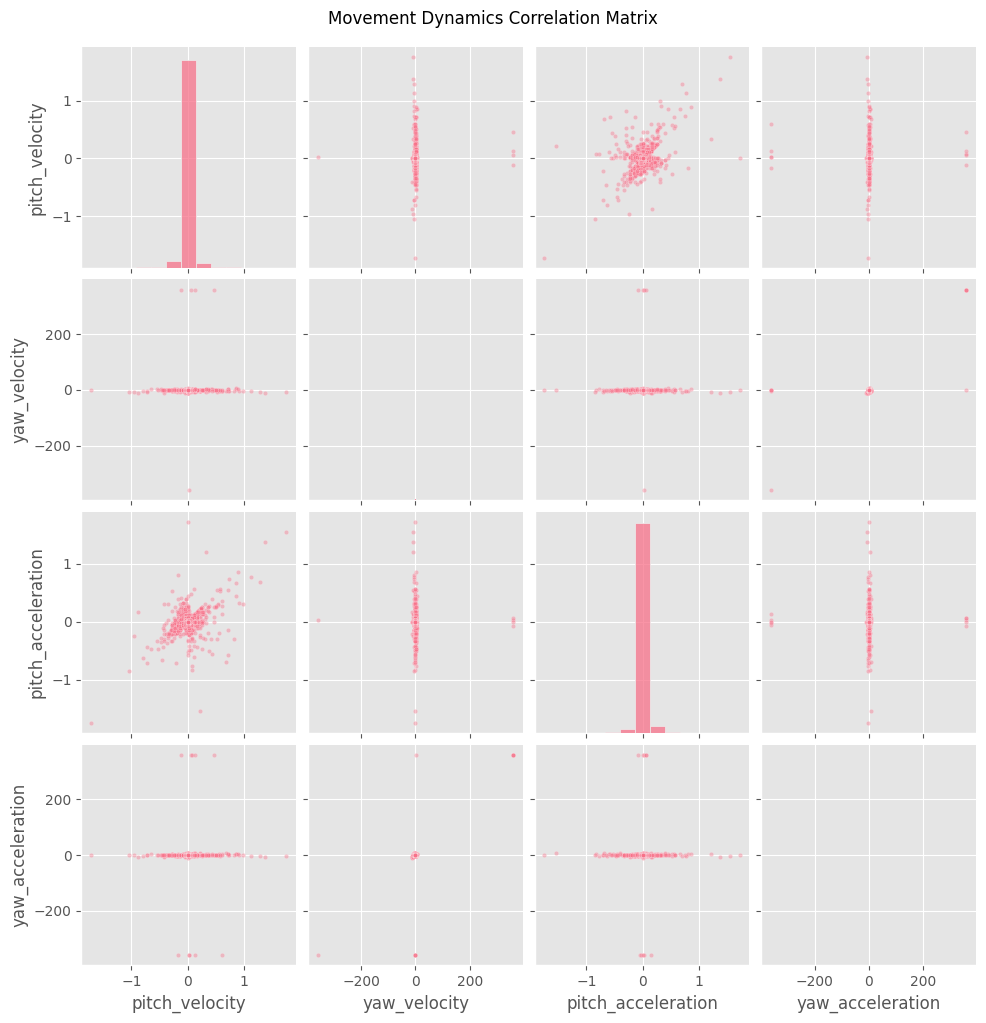

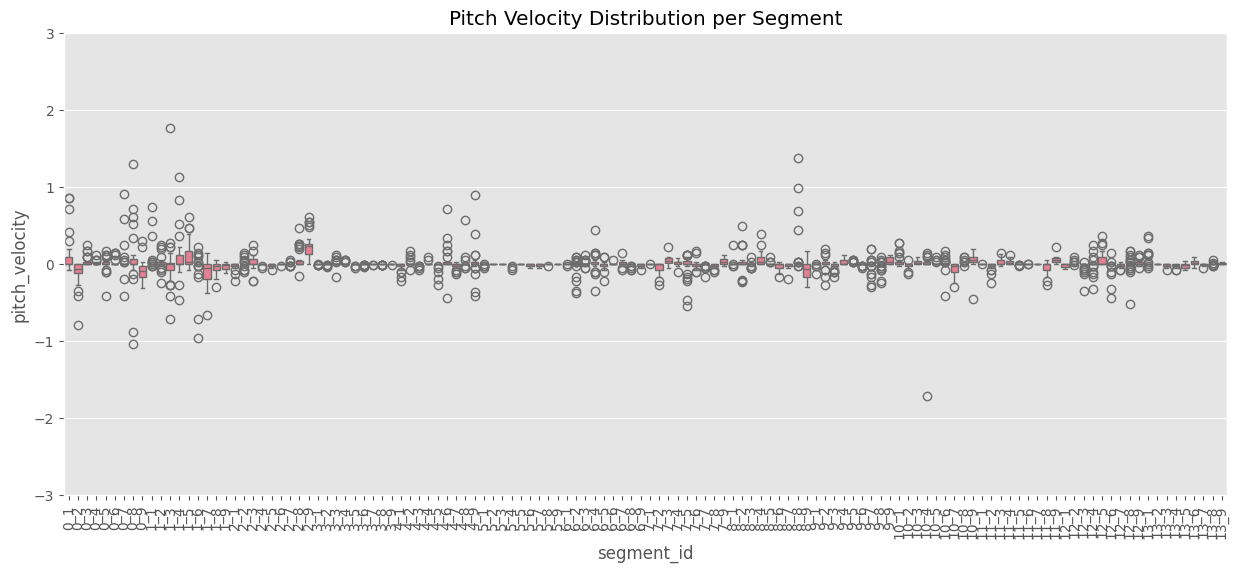

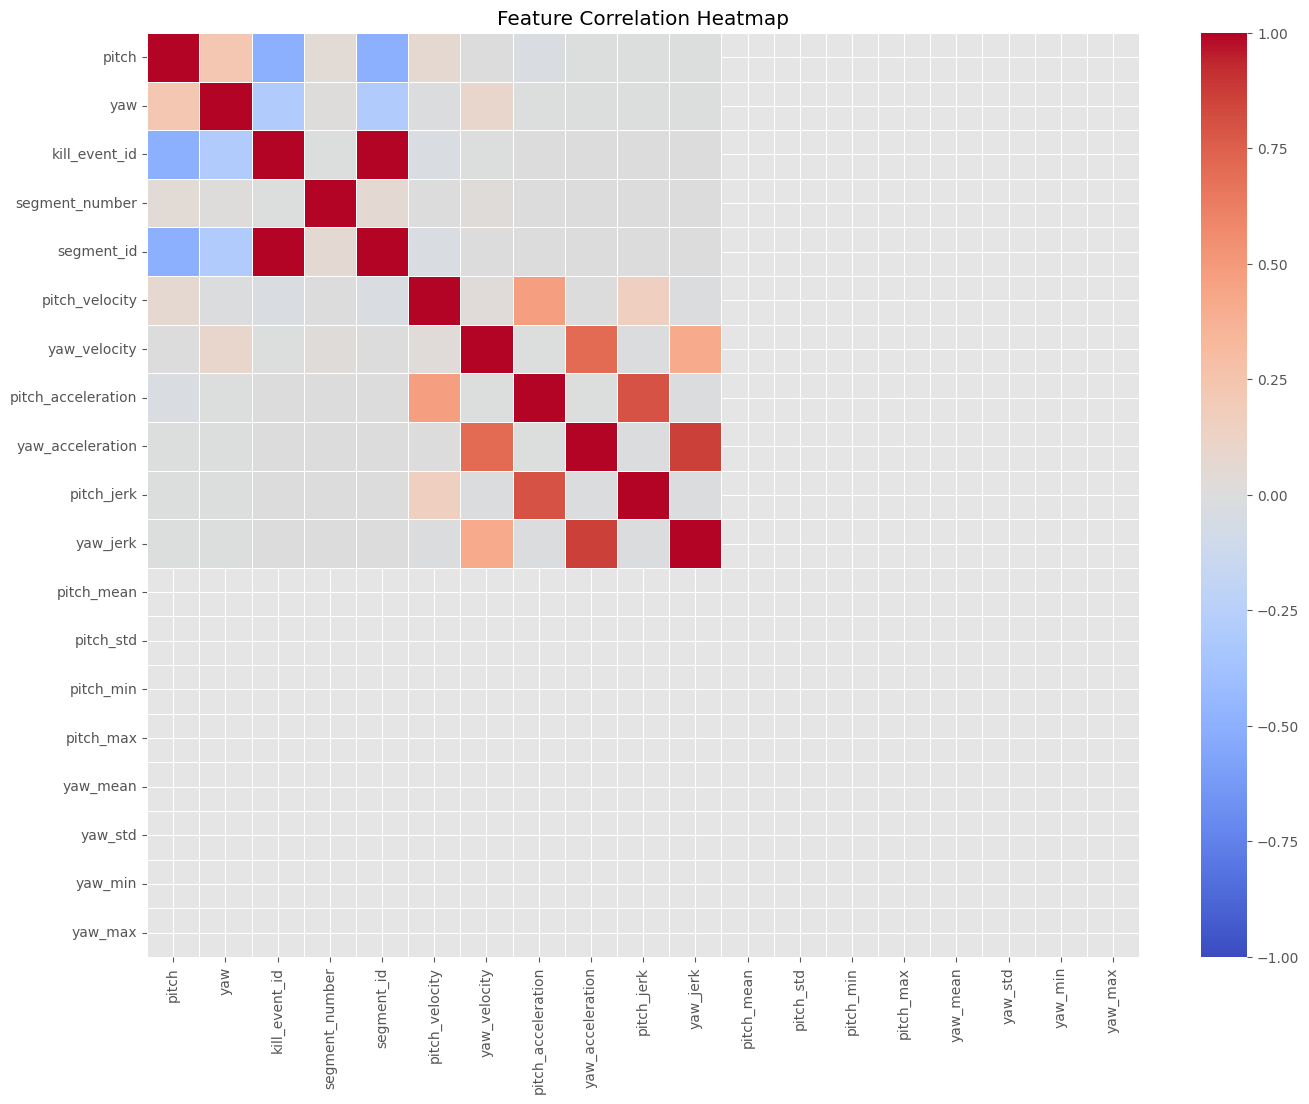

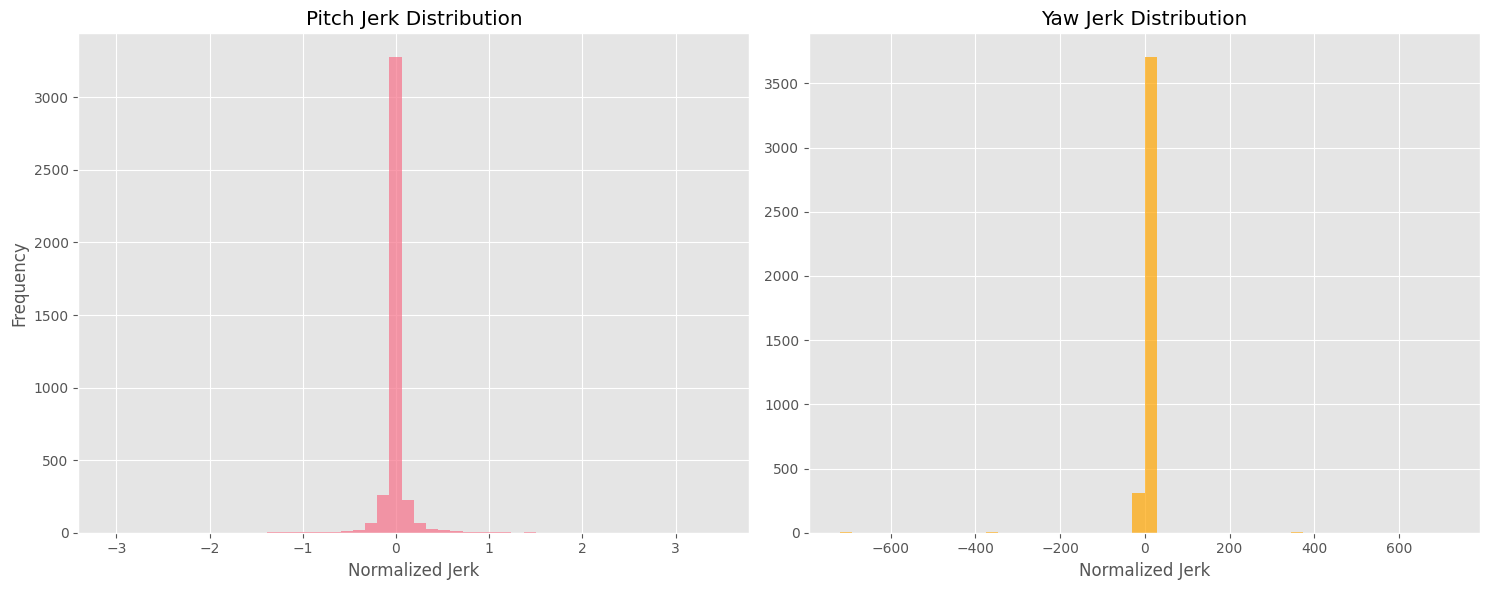

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read processed data
processed_dir = "engineered_data"
df = pd.read_csv(f"{processed_dir}/user_76561199039565051_engineered.csv")

# Set up visualization style
plt.style.use('ggplot')
sns.set_palette('husl')

# 1. Movement Dynamics Visualization
fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Pitch/Yaw Timeline
axs[0].plot(df['tick'], df['pitch'], label='Pitch')
axs[0].plot(df['tick'], df['yaw'], label='Yaw')
axs[0].set_title('Pitch/Yaw Movement Timeline')
axs[0].set_ylabel('Normalized Angle')
axs[0].legend()

# Velocity Comparison
axs[1].plot(df['tick'], df['pitch_velocity'], label='Pitch Velocity')
axs[1].plot(df['tick'], df['yaw_velocity'], label='Yaw Velocity')
axs[1].set_title('Angular Velocity Comparison')
axs[1].set_ylabel('Normalized Velocity')

# Acceleration Comparison
axs[2].plot(df['tick'], df['pitch_acceleration'], label='Pitch Acceleration')
axs[2].plot(df['tick'], df['yaw_acceleration'], label='Yaw Acceleration')
axs[2].set_title('Angular Acceleration Comparison')
axs[2].set_xlabel('Game Ticks')
axs[2].set_ylabel('Normalized Acceleration')

plt.tight_layout()
plt.show()

# 2. Suspicious Movement Scatter Matrix
sns.pairplot(df[['pitch_velocity', 'yaw_velocity', 
                'pitch_acceleration', 'yaw_acceleration']],
             plot_kws={'alpha':0.4, 's':10})
plt.suptitle('Movement Dynamics Correlation Matrix', y=1.02)
plt.show()

# 3. Segment Analysis Box Plots
plt.figure(figsize=(15, 6))
sns.boxplot(x='segment_id', y='pitch_velocity', data=df)
plt.title('Pitch Velocity Distribution per Segment')
plt.xticks(rotation=90)
plt.ylim(-3, 3)  # Based on normalized scale
plt.show()

# 4. Heatmap of Feature Correlations
corr_matrix = df.drop(['steamid', 'tick'], axis=1).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', 
           vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 5. Jerk Analysis (Sudden Movement Detection)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(df['pitch_jerk'], bins=50, alpha=0.7)
ax[0].set_title('Pitch Jerk Distribution')
ax[0].set_xlabel('Normalized Jerk')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['yaw_jerk'], bins=50, alpha=0.7, color='orange')
ax[1].set_title('Yaw Jerk Distribution')
ax[1].set_xlabel('Normalized Jerk')

plt.tight_layout()
plt.show()
